# Model Training and Exploration

## Image Mining

We will use google images for 3 kinds of rodents. The google image serach is:
1. Common **city** rat: "Rattus norvegicus" -suicide -fox -CD -skeleton -arts -protein -prepared -shirt -gene -stranglers
2. European Water Vole (Rat **Taupier**/Compagnol in french): "Arvicola amphibius" -skull
3. **Coypu**, nutria (Ragondin in french): "Myocastor coypus"

On the console of your web browser after displaying all the images to mine :

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

We retrieve 3 .txt files with the linksof the images. From now on we use fastai.

In [1]:
from fastai.vision import *

In [2]:
names = ['city', 'coypu', 'taupier']

In [3]:
# Use fastai "download_images" to download images, 
# for each class, into created (mkdir) folders
for name in names:
    folder = f'{name}'
    file = f'{name}.txt'

    path = Path('data')
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)

    download_images(file, dest, max_pics=200)

In [5]:
np.random.seed(42) 

# We define our data using ImageDataBunch method. The images are taken from our created folders (from_folder method)
# the validation set (valid_pct=0.2) is taken from within the data (path, train=".")
# images are resized: size=224
# and pixels normalized: normalize(imagenet_stats)

data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [6]:
data.classes # we check that we have inputted 3 classes

['city', 'coypu', 'taupier']

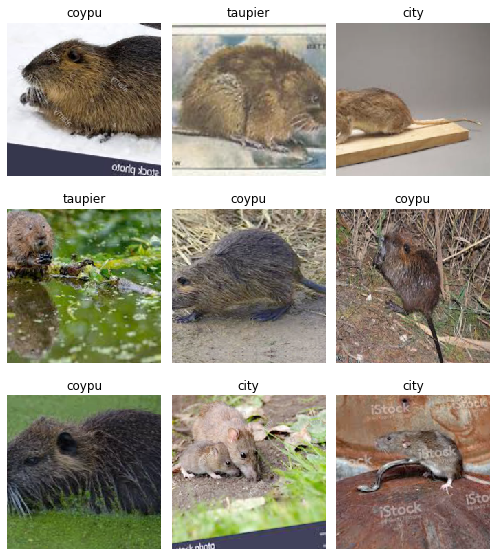

In [7]:
data.show_batch(rows=3, figsize=(7,8)) # show_batch method to display a sample of our dataset

Seems quite a challenge to distinguish all this "rats". 😄

In [8]:
# we define our Convolution Neural Network
# resnet34 is a pretrained model: https://pytorch.org/hub/pytorch_vision_resnet/
# metrics in our validation set is the accuracy
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [11]:
# We train our model
learn.fit_one_cycle(2) # TODO: more epochs

# we save it
learn.save('stage-1')

epoch,train_loss,valid_loss,error_rate,time
0,0.326250,0.295109,0.085470,07:04
1,0.272531,0.248699,0.076923,07:54


![](https://i.pinimg.com/236x/eb/ae/f4/ebaef44cca839e08eedebb2f5f80ea13--deep-learning-machine-learning.jpg)

In [ ]:
# We are going to unfreeze the model in order to find a good learning rate: 

learn.unfreeze() # Unfreeze entire model: sets every layer group to trainable (i.e. requires_grad=True).
learn.lr_find()  # Evaluates loss vs a wide range of learning rates
learn.recorder.plot() # plot it 

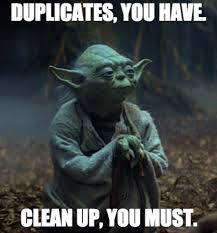